In [2]:
import sys
sys.path.append("../dataprocessing")
import numpy as np
import os
import PIL
import PIL.Image
from PIL import ImageDraw
import tensorflow as tf
# import tensorflow_datasets as tfds
import pandas as pd
from tqdm import tqdm
import random
import data_process
import matplotlib.pyplot as plt
import seaborn as sns
import cv2

In [3]:
landmarks = pd.read_csv('../data/images/202208.20172106650/202208.20172106650.csv')

In [68]:
def show_img(data, path, landmark_points, order):
    img = cv2.imread(path, cv2.IMREAD_COLOR)
    landmark_points = landmark_points.iloc[:order]
    drawing_image = img.copy()
    # print(int(float(path.split('/')[4][:-4])))
    # for idx in landmark_points.index:
    #     radius = 2
    #     x = data.loc[int(float(path.split('/')[4][:-4]))][idx[:-1]+"x"]
    #     y = data.loc[int(float(path.split('/')[4][:-4]))][idx]
    #     # print(x,y)
    #     cv2.circle(drawing_image, center= tuple([int(x),int(y)]), radius=3, color=(0,255,0), thickness=-1, lineType=cv2.LINE_AA)
    target_landmark = [point[:-1] for point in landmark_points.index]
    for idx in range(1,len(data.columns),2):
        radius = 2
        x = data.loc[int(float(path.split('/')[4][:-4]))][data.columns[idx]]
        y = data.loc[int(float(path.split('/')[4][:-4]))][data.columns[idx+1]]
        # if data.columns[idx] == 'frame':
        #     continue
        if data.columns[idx][:-1] in target_landmark:
            # print(x,y)
            cv2.circle(drawing_image, center= tuple([int(x),int(y)]), radius=radius*2, color=(255,255,0), thickness=-1, lineType=cv2.LINE_AA)
        else:
            cv2.circle(drawing_image, center= tuple([int(x),int(y)]), radius=radius, color=(0,255,0), thickness=-1, lineType=cv2.LINE_AA)
    # img_show(drawing_image)
    # left = landmarks.iloc[order]['left']
    # top = landmarks.iloc[order]['top']
    # right = landmarks.iloc[order]['right']
    # bottom = landmarks.iloc[order]['bottom']
    plt.subplots(figsize=(15,15))
    # cv2.rectangle(drawing_image, (int(left), int(top)), (int(right), int(bottom)), (255, 255, 0), 3)
    plt.imshow(cv2.cvtColor(drawing_image, cv2.COLOR_BGR2RGB))
    plt.axis('off')

In [5]:
def show_diff(data, window):
    diff_df = pd.DataFrame(index=list(set(data.columns) - {'frame','left','top','right','bottom','time_diff'}), columns=['value'])
    for col in data.columns:
        if col in ['frame','left','top','right','bottom','time_diff']:
            continue
        else:
            temp = 0.0
            for start in range(0,len(data.index), window):
                # print(max(data.iloc[start:start+5][col]) - min(data.iloc[start:start+5][col]), max(data.iloc[start:start+5][col]), min(data.iloc[start:start+5][col]))
                temp += max(data.iloc[start:start+5][col]) - min(data.iloc[start:start+5][col])
            diff_df.loc[col] = temp
    return diff_df

In [73]:
def make_flow_chart(data, diff_list, part, order, image_order):
    fig, ax = plt.subplots(figsize = (20,10))
    sort = diff_list.sort_values(by='value',ascending=False).iloc[:order]
    print(sort)
    new_data = data[sort.index]
    # new_data = new_data[[point for point in new_data.columns if str(part) == point.split('-')[0]]]
    temp_plot = sns.lineplot(data = new_data, markers=False, dashes=False)  
    show_img(data, '../data/images/202208.20172106650/' + str(image_order) + '.0.jpg', diff_list, order)
    # ax[idx, col].set_title(str(idx) +" 번 클러스터")
    # if col==0:        
    #     ax[idx, col].set_ylabel(list(custom_sort.keys())[idx])
    #     ax[idx, col].yaxis.label.set_size(20)
    # ax[idx].set_ylabel(list(custom_sort.keys())[idx] + " group")
    # ax[idx].set_xticks(list(range(1,len(seq)+1)))
    # if idx==0:
    #     ax[idx].set_title(str(col+1) +" 주차")
    # for bar in temp_plot.patches:
    #     ax[idx].annotate(int(bar.get_height()), # 천단위 콤마 표시
    #                 (bar.get_x() + bar.get_width() / 2,
    #                 bar.get_height()), ha='center', va='center',
    #                 size=10, xytext=(0, 3),
    #                 textcoords='offset points')
    # for row in data.iterrows():
    #     ax[idx].text(row[0], int(row[1]['quiz']), int(row[1]['quiz']), fontsize=12, ha='center') 
    #     ax[idx].text(row[0], int(row[1]['proj']), int(row[1]['proj']), fontsize=12, ha='center')

In [8]:
landmarks_cut = landmarks[['frame'] + [point for point in landmarks.columns if '-' in point]]
diff_list = show_diff(landmarks_cut, 5)
diff_list

,value
0-35y,86.0
5-12x,60.0
2-2x,67.0
0-33y,86.0
10-4x,45.0
...,...
0-33x,67.0
9-5x,46.0
0-18y,55.0
7-0y,26.0


> 0은 얼굴 테두리 \
> 1, 2는 왼쪽 눈썹 위, 아래 \
> 3, 4는 오른쪽 눈썹 위, 아래 \
> 5, 6은 왼쪽, 오른쪽 눈 \
> 7, 8은 위쪽 입술 윗부분, 아래부분 \
> 9, 10은 아래쪽 입술 윗부분, 아래부분 \
> 11은 코 세로축 \
> 12는 코 아래부분

      value
3-2y  153.0
4-2y  151.0
3-3y  146.0
4-3y  144.0
3-1y  144.0
4-1y  138.0
3-4y  137.0
1-3y  131.0
2-3y  126.0
1-4y  125.0


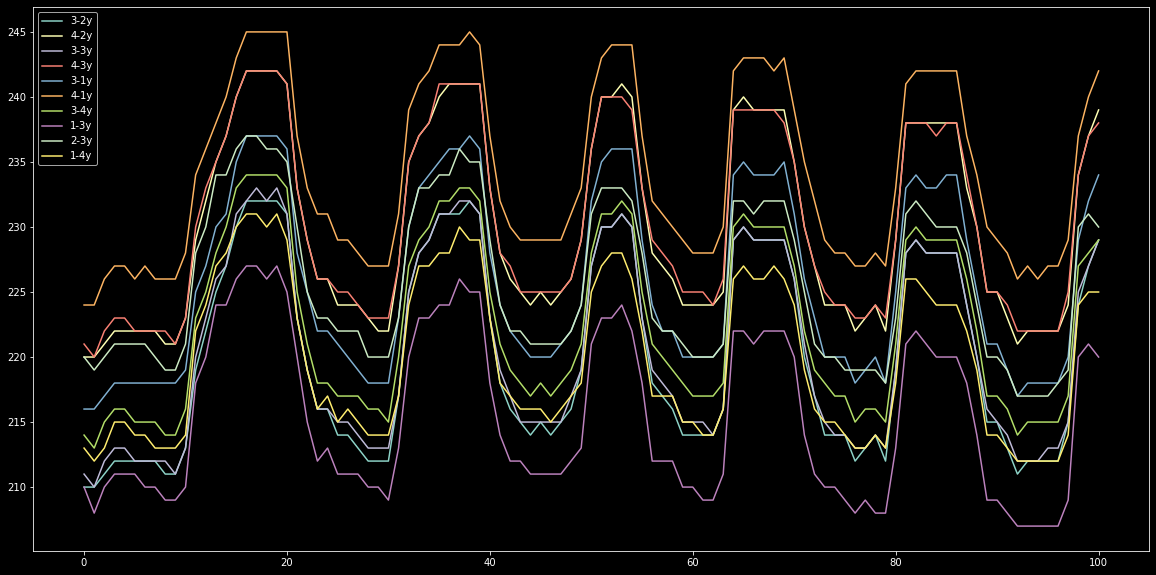

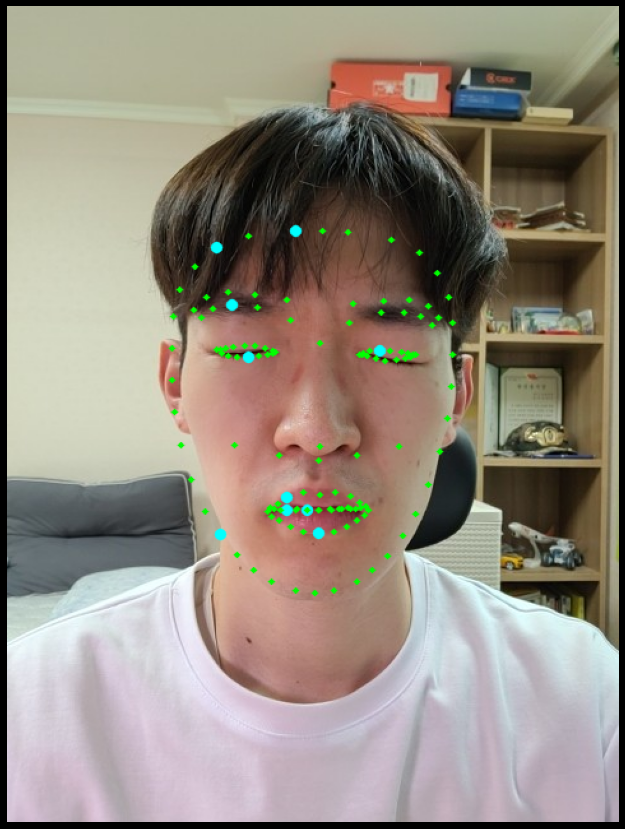

In [75]:
make_flow_chart(data = landmarks_cut, diff_list = diff_list, part= 1, order = 10, image_order = 15)